In [1]:
# important libs and constants
import plot_utils as p
import functions as fct
import ODE_solver as odes
import numpy as np
G = 6.674e-11  # N*m^2/Kg^2
Msolar = 1.989e30  # kg
Rsolar = 6.957e8  # in m
c = 299792458.0  # m/s

# might change (m1 is mass of main star, m2 mass of companion)
m1 = 20*Msolar  # kg
m2 = 20*Msolar  # kg

In [2]:
# max separation for merge within age of universe
a_max = fct.max_separation(1.36e10, m1, m2)
print("a_max =", format(a_max*100, ".3e"), 'cm')
P_max = fct.orbital_period(a_max, m1, m2)/(3600*24)
print("P_max =", format(P_max, ".3e"), "days")

a_max = 2.414e+12 cm
P_max = 3.743e+00 days


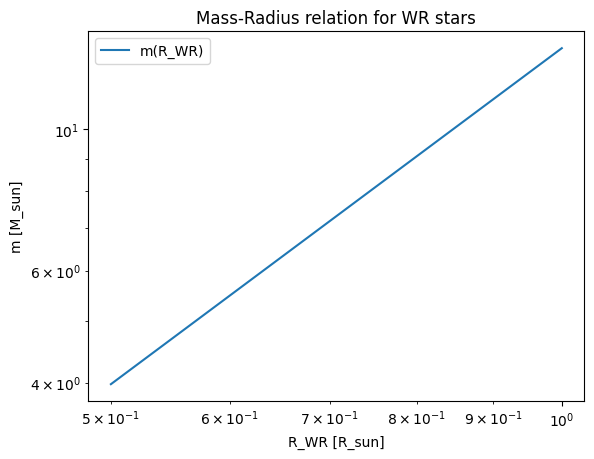

In [3]:
# dependence of m and R of WR stars
RWR = np.linspace(0.5, 1, 1000)  # in solar radii
m = fct.mass_from_radius(RWR)  # in solar masses
p.loglog2d(RWR, m, xlabel="R_WR [R_sun]", ylabel="m [M_sun]",
           title='Mass-Radius relation for WR stars', legend='m(R_WR)')

In [4]:
# minimum separation for stars to be detached
q = m1/m2
RWR1 = fct.radius_from_mass(m1/Msolar)  # in solar radii
a_min = fct.min_separation(q, RWR1)  # in solar radii
a_min_si = a_min*Rsolar  # in m
print("a_min =", format(a_min_si*100, ".3e"), 'cm')
P_min = fct.orbital_period(a_min_si, m1, m2)/(3600)
print("P_min =", format(P_min, ".3e"), "hours")

a_min = 2.305e+11 cm
P_min = 2.650e+00 hours


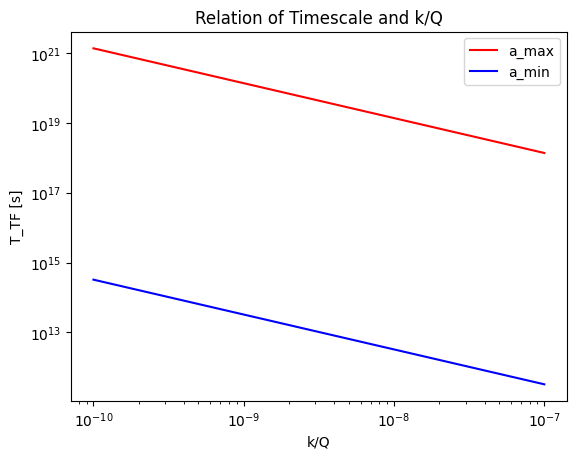

In [5]:
# plot the tidal friction timescale τTF as a function of k/Q for a_max and a_min
import matplotlib.pyplot as pl
k = 0.001
Q = np.linspace(1e4, 1e7, 1000)
fmax = fct.gw_frequency(a_max, m1, m2)
fmin = fct.gw_frequency(a_min_si, m1, m2)
T_TF_max = fct.tidal_friction_timescale(m1, m2, Q, k, a_max, RWR1, fmax)
T_TF_min = fct.tidal_friction_timescale(m1, m2, Q, k, a_min_si, RWR1, fmin)
pl.loglog(k/Q, T_TF_max, color='r', label="a_max")
pl.legend()
p.loglog2d(k/Q, T_TF_min, xlabel="k/Q",
           ylabel="T_TF [s]", title='Relation of Timescale and k/Q', legend="a_min", colour='b')

In [6]:
# the mean and median τTF in years
k = 0.001
Qmax = 1e7
Qmin = 1e4
print('The mean of the timescale when a=a_max is', fct.mean(fct.tidal_friction_timescale_integrable,
      k/Qmax, k/Qmin, m1, m2, a_max, RWR1, fmax)/(3600*24*365.25), 'years.')
print('The median of the timescale when a=a_max is', fct.median(fct.tidal_friction_timescale_integrable,
      k/Qmax, k/Qmin, m1, m2, a_max, RWR1, fmax)/(3600*24*365.25), 'years.')
print('The mean of the timescale when a=a_min is', fct.mean(fct.tidal_friction_timescale_integrable,
      k/Qmax, k/Qmin, m1, m2, a_min_si, RWR1, fmin)/(3600*24*365.25), 'years.')
print('The median of the timescale when a=a_min is', fct.median(fct.tidal_friction_timescale_integrable,
      k/Qmax, k/Qmin, m1, m2, a_min_si, RWR1, fmin)/(3600*24*365.25), 'years.')

The mean of the timescale when a=a_max is 303341185736.38824 years.
The median of the timescale when a=a_max is 1.0021094710826927e-16 years.
The mean of the timescale when a=a_min is 70988.00794862818 years.
The median of the timescale when a=a_min is 1.0021094710826926e-16 years.


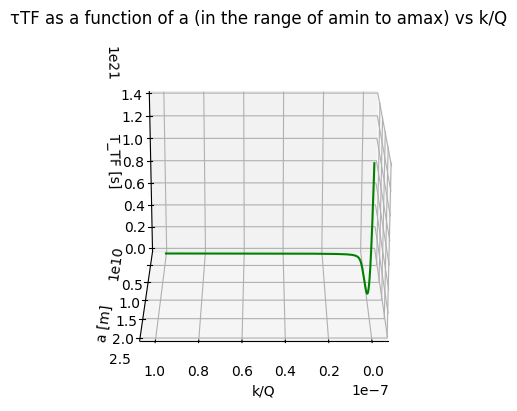

In [7]:
# 3D plot for τTF as a function of a (in the range of amin to amax) vs k/Q
a = np.linspace(a_min_si, a_max, 1000)
k = 0.001
Q = np.linspace(1e4, 1e7, 1000)
T_TF = fct.tidal_friction_timescale(
    m1, m2, Q, k, a, RWR1, fct.gw_frequency(a, m1, m2))
p.plot3d(k/Q, a, T_TF, xlabel='k/Q', ylabel='a [m]', zlabel='T_TF [s]',
         title='τTF as a function of a (in the range of amin to amax) vs k/Q', legend=None, colour='green')

In [8]:
# timescales for diff Qs, only T4 and T5 are physically likely, all are for a_min
k = 0.001
for Q in [1e4, 1e5, 1e6, 1e7]:
    T_TF = fct.tidal_friction_timescale(
        m1, m2, Q, k, a_min_si, RWR1, fmin)/(3600*24*365.25)
    print(T_TF, 'years for Q =', format(Q, '.3e'), 'and k =', k, 'at a_min')

10266.29014442 years for Q = 1.000e+04 and k = 0.001 at a_min
102662.9014442 years for Q = 1.000e+05 and k = 0.001 at a_min
1026629.0144419998 years for Q = 1.000e+06 and k = 0.001 at a_min
10266290.14442 years for Q = 1.000e+07 and k = 0.001 at a_min


In [9]:
# integrated the ODEs for tidal evolution over a certain lifetime
# df/dt = g(f, Omega)
# dOmega/dt = h(f, Omega)
k = 0.001
Q = 1e5
rg2 = 0.1
R1 = RWR1*Rsolar  # in m

K1 = (18*k/Q)*(m2*(np.pi**(13/3))*(R1**5))/((G**(5/3))*m1*rg2*(m1+m2)**(5/3))
K2 = (3*k/Q)*((m2**2)*(np.pi**3)*(R1**3))/(G*m1*rg2*(m1+m2)**2)

lifetime = 1000  # time in years
tfinal = lifetime*365.25*24*3600  # time in s


def dfdt(f, Omega):
    return K1*(f**(13/3))*(f/2-Omega)


def dOmegadt(f, Omega):
    return K2*(f**3)*(f/2-Omega)


sols = odes.solve_Radau(
    dxdt=dfdt, dydt=dOmegadt, x0=1, y0=1, t0=0, tfinal=tfinal, x_scale=1, y_scale=1.0, t_scale=1.0)

t = sols[0]/(3600*24*365.25)  # in years
f = sols[1]  # in Hz
Omega = sols[2]  # in Hz

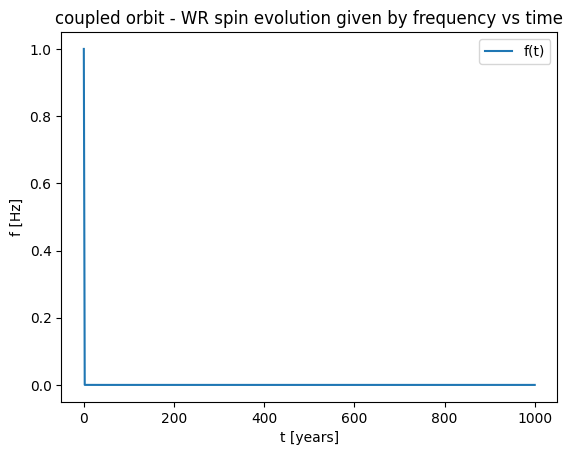

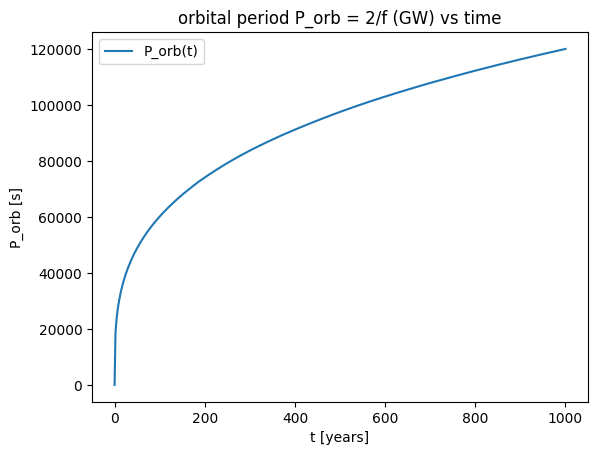

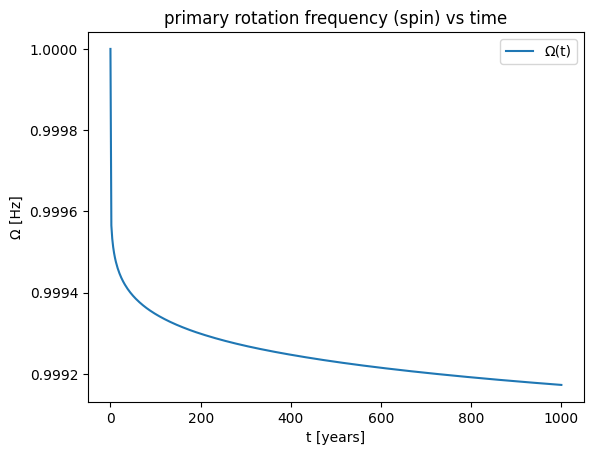

In [10]:
# plots based on the odes round 1 (worksheet)
# plot f(t)
p.plot2d(t, f, xlabel='t [years]',
         ylabel='f [Hz]', title='coupled orbit - WR spin evolution given by frequency vs time', legend='f(t)', colour=None)
# plot P(t)
p.plot2d(t, 2/f, xlabel='t [years]',
         ylabel='P_orb [s]', title='orbital period P_orb = 2/f (GW) vs time', legend='P_orb(t)', colour=None)
# plot Omega(t)
p.plot2d(t, Omega, xlabel='t [years]',
         ylabel='Ω [Hz]', title='primary rotation frequency (spin) vs time', legend='Ω(t)', colour=None)

In [11]:
# omegafinal and angular momentum
omegafinal = Omega[-1]
print('The final spin frequency is', format(omegafinal, '.3e'), 'Hz')
J = rg2*m1*(R1**2)*omegafinal
print('The angular momentum is', format(J, '.3e'), 'kg m^2/s')

The final spin frequency is 9.992e-01 Hz
The angular momentum is 3.032e+48 kg m^2/s
